In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerate

ImportError: cannot import name 'ImageDataGenerate' from 'tensorflow.keras.preprocessing.image' (C:\Users\ADMIN\anaconda3\lib\site-packages\keras\api\_v2\keras\preprocessing\image\__init__.py)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [8]:
x_train = train_datagen.flow_from_directory(r"C:\Users\ADMIN\Desktop\Assignment Files\Flowers-Dataset\flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [12]:
model = Sequential()

In [13]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))

In [14]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(300, activation = "relu"))

In [17]:
model.add(Dense(150, activation = "relu")) #mulitple dense layers

In [18]:
model.add(Dense(5, activation = "softmax")) #output layer

In [19]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

In [20]:
len(x_train)

44

In [49]:
model.fit(x_train, epochs = 5, steps_per_epoch = len(x_train))

Epoch 1/5
 6/44 [===>..........................] - ETA: 43s - loss: 0.6863 - accuracy: 0.7317

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ADMIN\\Desktop\\Assignment Files\\Flowers-Dataset\\flowers\\rose\\118974357_0faa23cce9_n.jpg'
Traceback (most recent call last):

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1035, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 903, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 1050, in generator_fn
    yield x[i]

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ADMIN\\Desktop\\Assignment Files\\Flowers-Dataset\\flowers\\rose\\118974357_0faa23cce9_n.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_4589]

In [24]:
model.save("C:\\Users\\ADMIN\\Desktop\\Assignment Files\\flowers.h5")

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [33]:
model = load_model("flowers.h5")

In [37]:
img = image.load_img("E:\\img.jpeg", target_size = (64,64) )

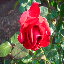

In [38]:
img

In [39]:
    x = image.img_to_array(img)

In [40]:
x.ndim

3

In [41]:
x = np.expand_dims(x,axis = 0)

In [42]:
x.ndim

4

In [43]:
pred = model.predict(x)

1/1 [==============================] - 0s 493ms/step


In [44]:
pred

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [45]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']

In [47]:
labels[np.argmax(pred)]

'tulips'